# Classification
In classification, the goal is to predict class label, which is a choice from a predefined of possibilities.
Classification is divided into binary classification(have positive and negative classes) and multiclass classification. You can image binary classification as classification that gives answers to yes/no questions.

In [1]:
# Import and setup libraries.
%matplotlib notebook
%matplotlib inline

import warnings
warnings.warn = lambda *args, **kwargs: None

import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
import sklearn

plt.rc("font", size=14)
plt.rcParams["figure.figsize"] = (10, 5)

## Iris example

y_train shape: (112,)
y_test shape: (38,)


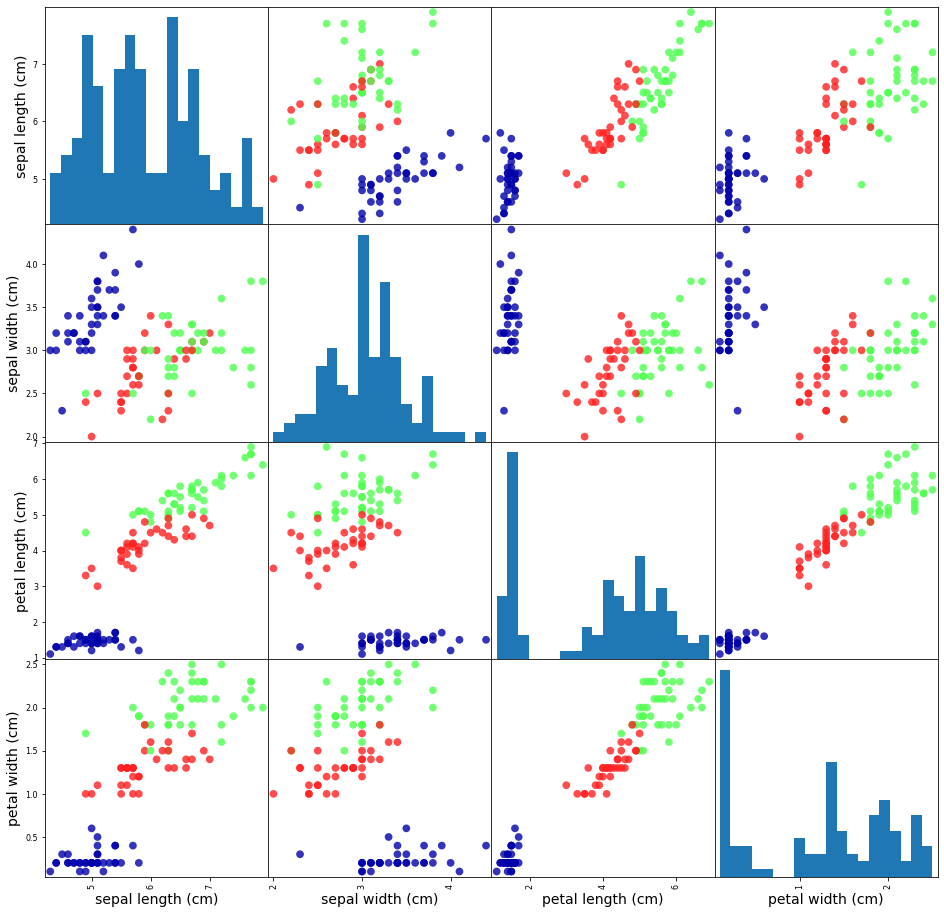

In [2]:
iris_ds = sklearn.datasets.load_iris()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    iris_ds["data"], 
    iris_ds["target"], 
    random_state=0
)

# 'train_test_split' splits into 75% of the rows for train and 25% of the rows for test.
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Pair plot of the iris data.
grr = pd.plotting.scatter_matrix(
    pd.DataFrame(X_train, columns=iris_ds.feature_names),
    c=y_train,
    figsize=(16, 16),
    marker="o",
    hist_kwds={"bins": 20},
    s=60,
    alpha=0.8,
    cmap=mglearn.cm3
)

### Linear classification

$
\begin{aligned}
&X^{l} = (x_{i}, y_{i})^{l}_{i=1}, \, x_{i} \in \mathbb{R}^{n}, \, y_{i} \in -1, +1 - \text{training sample} \\
&a(x, w) = sign \langle x, w \rangle = sign \sum_{j=1}^{n}w_{j} f_{j}(x), \, w \in \mathbb{R}^{n} - \text{classification model} \\
&L(a, y) = [\,ay < 0 ]\, = [\,\langle x, w \rangle y < 0]\, \leqslant L(\langle x, w \rangle y) - \text{loss function(ordinary least squares)} \\
&Q(w) = \sum_{i=1}^{l}[\,\langle x_{i}, w \rangle y_{i} < 0]\  \leqslant \sum_{i=1}^{l} L(\langle x_{i}, w \rangle y_{i})  \rightarrow \min_{w} - \text{learning method}
\end{aligned}
$

#### Margin
Margin describes an element position from a dividing surface. If margin is below zero, algorithm $g(x, w)$ makes an error. 

$
\begin{aligned}
&a(x, w) = sign \, g(x, w), \, g(x, w) - \text{discriminant function} \\
&g(x, w) = 0 - \text{dividing surface equation} \\
&M_{i} = g(x_{i}, w)y_{i} - \text{margin of } x_{i} \\
\end{aligned}
$

#### Maximum likelihood estimation (MLE)
From a statistical standpoint, a given set of observations are a random sample from an unknown population. The goal of maximum likelihood estimation is to make inferences about the population that is most likely to have generated the sample, specifically the joint probability distribution of the random variables $Y$

$
\begin{aligned}
&X \times Y - p(x, y | w) = p(y|x, w) p(x) \\
&X^{l}: (x_{i}, y_{i})^{l}_{i=i} \sim p(x, y | w) \\
\\
&\prod_{i=1}^{l} p(x_{i}, y_{i} | w) = \prod_{i=1}^{l}  p(y_{i}|x_{i}, w) p(x)  \simeq \prod_{i=1}^{l}  p(y_{i}|x_{i}, w) \rightarrow \min_{w} \\
&S(w) = \sum_{i=1}^{l} \log p(y_{i}|x_{i}, w) \rightarrow \max_{w}
\\
&Q(w) = \sum_{i=1}^{l} L(g(x_{i}, w)y_{i}) \rightarrow \min_{w} - \text{empirical risk minimization, ERM}
\\
&\text{MLE is equivalent to ERM if: } -\log  p(y_{i}|x_{i}, w) = L(M_{i})
\end{aligned}
$

#### Two-class logistic regression

$
\begin{aligned}
&a(x, w) = sign \langle x, w \rangle, \, x, w \in \mathbb{R}^{n} \\
&M = \langle x, w \rangle y \\
&L(M) = \log(1 + \exp^{-M}) \rightarrow P(y| x, w) =  \sigma(M) = \frac{1}{1 + \exp^{-M}} \\
&\sigma(M) +  \sigma(-M) = 1 \\
&Q(w) = \sum_{i=1}^{l}\log(1 + \exp(-\langle x_{i}, w \rangle y_{i}))  \rightarrow \min_{w}
\end{aligned}
$

#### Support vector machine (SVM)
##### Hard-margin
$
\begin{aligned}
&a(x, w) = sign \langle x, w \rangle, - w_{0}\, x, w \in \mathbb{R}^{n} \\
&X^{l} = (x_{i}, y_{i})^{l}_{i=1} \text{ - linearly separable } \implies \exists w, w_{0}: M_{i}(w, w_{0}) = \langle x_{i}, w - w_{0}\rangle y > 0, i = 1,..,l \\
&\text{Normalization: } \min_{i=1,..,l}M_{i}(w, w_{0}) = 1 \\
&\text{Dividing hyperplane in the middle: } \{x: -1 \leq \langle x, w \rangle, - w_{0} \leq 1\} \\
\\
&\exists x_{+}: \langle x_{+}, w \rangle, - w_{0} = +1 \\
&\exists x_{-}: \langle x_{-}, w \rangle, - w_{0} = -1 \\
&\text{The distance between two hyperplanes: } \frac{\langle x_{+} - x_{-}, w \rangle}{\Vert{w}\Vert} = \frac{2}{\Vert{w}\Vert} \rightarrow \max
\end{aligned}
$
<img src="img/1024px-SVM_margin.png" width="480px" align="left">

$
\begin{aligned}
&\begin{cases} 
\frac{\Vert{w}\Vert^{2}}{2} \rightarrow \min_{w, w_{0}} \\ 
M_{i}(w, w_{0}) \geq 1, i = 1,..,l 
\end{cases}
\end{aligned}
$

##### Soft-margin

$
\begin{aligned}
&\begin{cases} 
\frac{\Vert{w}\Vert^{2}}{2} + C\sum_{i=1}^{l}\xi_{i} \rightarrow \min_{w, w_{0}, \xi} \\ 
M_{i}(w, w_{0}) \geq 1 - \xi_{i}, i = 1,..,l \\
\xi_{i} \geq 0, i = 1,..,l
\end{cases}
\text{, where } \xi \text{ is a penalty}
\\
\end{aligned}
$

### Metric methods

$
\begin{aligned}
&\text{Euclidean distance: } \rho(x, x_{i}) = (\sum_{j=1}^{n}|x_{j}-x_{(i)j}|^{2})^\frac{1}{2} \\
&\text{Minkowski distance: } \rho(x, x_{i}) = (\sum_{j=1}^{n}|x_{j}-x_{(i)j}|^{p})^\frac{1}{p} \\
\\
\\
&\text{For } x \in X \text{ we rearrange } x_{1}, x_{2}, .., x_{l}: \rho(x, x^{(1)}) \leqslant \rho(x, x^{(2)}) \leqslant .. \leqslant  \rho(x, x^{(l)}) \\
&a(x;X^{l}) = \arg \max_{y \in Y} \sum_{i=1}^{l}[\,y^{(i)} = y]\, w(i, x) =  \arg \max_{y \in Y} \Gamma_{y}(x)\\
&w(i, x) = [\,i \leqslant k] - \text{k-nearest neighbors}\\
\end{aligned}
$

Advantages:
* Lazy learning
* We can optimize ${k}$ using leave-one-out $LOO(k, X^{l})=\sum_{i=1}^{l}[\ a(x_{i}; X^{l} \backslash \{ x_{i} \}, k) \ne y_{i}]\  \rightarrow \min_{k}  $

#### Parzen window

$
\begin{aligned}
&w(i, x) = K(\frac{\rho(x, x^{(i)})}{h}) \text{, where h - window size and K - kernel - a non-negative function} \\
\end{aligned}
$

#### Variable parzen window

$
\begin{aligned}
&w(i, x) = K(\frac{\rho(x, x^{(i)})}{\rho(x, x^{(k+1)})}) \text{, where h - window size, K - kernel - a non-negative function and k - a number of neighbors} \\
\end{aligned}
$

#### k-nearest neighbors
This is the simplest machine learning algorithm. A model stores all training set. It needs to search nearest data points for a prediction. If number if neighbors more than one, it uses a voting for assigning a label. 

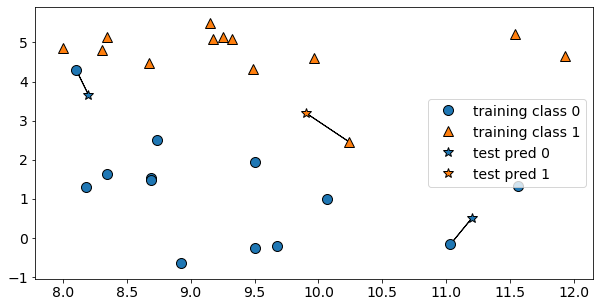

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

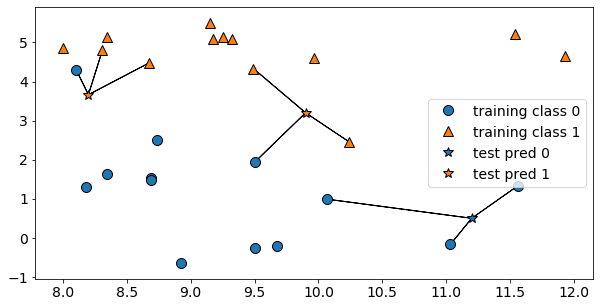

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [5]:
# Building a knn model.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

# Making prediction.
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = model.predict(X_new)
print(f"Predicted target name: {iris_ds['target_names'][prediction]}")
      
# Evaluating the model.
y_pred = model.predict(X_test)
print(f"Score: {np.mean(y_pred == y_test)}")
print(f"Score using 'score' method of knn object:{model.score(X_test, y_test)}")

Predicted target name: ['setosa']
Score: 0.9736842105263158
Score using 'score' method of knn object:0.9736842105263158


Strengths:
* Easy to understand 
* Fast training

Weaknesses:
* Badly with datasets with many features
* If dataset is large, a prediction might be slow
* Badly with sparse datasets
